Chapter 22: classification 

3. The data file contains 57 covariates relating to email messages. Each email message was classified as spam (Y=1) or not spam (Y=0). The outcome Y is the last column in the file. The goal is to predict whether an email is spam or not. A. Construct classification rules using i.LDA, ii. QDA, iii. logistic regression and iv. classification tree. For each report the observed misclassification error rate and construct a confusion matrix. 
B. Use 5-fold cross-validation to estimate the prediction accuracy of LDA and logistic regression.
C. Sometimes it helps to reduce the number of covariates. One strategy is to compare Xi for the spam and email group. For each of the 57 covariates test whether the mean of the covariate is the same or different between the two groups. Keep the 10 covariates with the smallest p-value. Try LDA and logistic regression only using these 10 variables.

In [22]:
import pandas as pd

data = pd.read_csv('spambase.csv', names=columns, header=0)
data.head()


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,class
0,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [15]:
# A.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

# Split data into features (X) and target (Y)
X = data.iloc[:, :-1]  # All columns except the last one
Y = data.iloc[:, -1]   # The last column

# Split into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dictionary to store results
results = {}

# 1. Linear Discriminant Analysis (LDA)
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled, Y_train)
lda_predictions = lda.predict(X_test_scaled)
lda_cm = confusion_matrix(Y_test, lda_predictions)
lda_error = 1 - accuracy_score(Y_test, lda_predictions)
results['LDA'] = {'confusion_matrix': lda_cm, 'misclassification_error': lda_error}

# 2. Quadratic Discriminant Analysis (QDA)
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train_scaled, Y_train)
qda_predictions = qda.predict(X_test_scaled)
qda_cm = confusion_matrix(Y_test, qda_predictions)
qda_error = 1 - accuracy_score(Y_test, qda_predictions)
results['QDA'] = {'confusion_matrix': qda_cm, 'misclassification_error': qda_error}

# 3. Logistic Regression
#Switch to a Different Solver
#If saga is not converging, consider trying other solvers like lbfgs or liblinear:
log_reg = LogisticRegression(max_iter=1000, solver='liblinear')
log_reg.fit(X_train_scaled, Y_train)
log_reg_predictions = log_reg.predict(X_test_scaled)
log_reg_cm = confusion_matrix(Y_test, log_reg_predictions)
log_reg_error = 1 - accuracy_score(Y_test, log_reg_predictions)
results['Logistic Regression'] = {'confusion_matrix': log_reg_cm, 'misclassification_error': log_reg_error}

# 4. Classification Tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_scaled, Y_train)
dt_predictions = decision_tree.predict(X_test_scaled)
dt_cm = confusion_matrix(Y_test, dt_predictions)
dt_error = 1 - accuracy_score(Y_test, dt_predictions)
results['Decision Tree'] = {'confusion_matrix': dt_cm, 'misclassification_error': dt_error}

# Display results
for model, metrics in results.items():
    print(f"{model}:")
    print(f"Confusion Matrix:\n{metrics['confusion_matrix']}")
    print(f"Misclassification Error Rate: {metrics['misclassification_error']:.4f}\n")


LDA:
Confusion Matrix:
[[757  47]
 [152 425]]
Misclassification Error Rate: 0.1441

QDA:
Confusion Matrix:
[[552 252]
 [ 29 548]]
Misclassification Error Rate: 0.2035

Logistic Regression:
Confusion Matrix:
[[754  50]
 [ 75 502]]
Misclassification Error Rate: 0.0905

Decision Tree:
Confusion Matrix:
[[736  68]
 [ 68 509]]
Misclassification Error Rate: 0.0985



/Users/ioannaioannidou/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [20]:
# B.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

# Split data into features (X) and target (Y)
X = data.iloc[:, :-1]  # All columns except the last one
Y = data.iloc[:, -1]   # The last column

# Split into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dictionary to store results
results = {}

# 1. Linear Discriminant Analysis (LDA)
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled, Y_train)
lda_predictions = lda.predict(X_test_scaled)
lda_cm = confusion_matrix(Y_test, lda_predictions)
lda_error = 1 - accuracy_score(Y_test, lda_predictions)
results['LDA'] = {'confusion_matrix': lda_cm, 'misclassification_error': lda_error}

# 2. Quadratic Discriminant Analysis (QDA)
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train_scaled, Y_train)
qda_predictions = qda.predict(X_test_scaled)
qda_cm = confusion_matrix(Y_test, qda_predictions)
qda_error = 1 - accuracy_score(Y_test, qda_predictions)
results['QDA'] = {'confusion_matrix': qda_cm, 'misclassification_error': qda_error}

# 3. Logistic Regression
log_reg = LogisticRegression(max_iter=1000, solver='lbfgs')
log_reg.fit(X_train_scaled, Y_train)
log_reg_predictions = log_reg.predict(X_test_scaled)
log_reg_cm = confusion_matrix(Y_test, log_reg_predictions)
log_reg_error = 1 - accuracy_score(Y_test, log_reg_predictions)
results['Logistic Regression'] = {'confusion_matrix': log_reg_cm, 'misclassification_error': log_reg_error}

# 4. Classification Tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_scaled, Y_train)
dt_predictions = decision_tree.predict(X_test_scaled)
dt_cm = confusion_matrix(Y_test, dt_predictions)
dt_error = 1 - accuracy_score(Y_test, dt_predictions)
results['Decision Tree'] = {'confusion_matrix': dt_cm, 'misclassification_error': dt_error}

# 5-Fold Cross-Validation for LDA and Logistic Regression
lda_cv_scores = cross_val_score(LinearDiscriminantAnalysis(), X, Y, cv=5, scoring='accuracy')
log_reg_cv_scores = cross_val_score(LogisticRegression(max_iter=1000, solver='saga'), X, Y, cv=5, scoring='accuracy')

print("5-Fold Cross-Validation Results:")
print(f"LDA Accuracy: {lda_cv_scores.mean():.4f} (Std: {lda_cv_scores.std():.4f})")
print(f"Logistic Regression Accuracy: {log_reg_cv_scores.mean():.4f} (Std: {log_reg_cv_scores.std():.4f})")

# Display results
for model, metrics in results.items():
    print(f"{model}:")
    print(f"Confusion Matrix:\n{metrics['confusion_matrix']}")
    print(f"Misclassification Error Rate: {metrics['misclassification_error']:.4f}\n")


/Users/ioannaioannidou/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/ioannaioannidou/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ioannaioannidou/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ioannaioannidou/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ioannaioannidou/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


5-Fold Cross-Validation Results:
LDA Accuracy: 0.8592 (Std: 0.0246)
Logistic Regression Accuracy: 0.5486 (Std: 0.0449)
LDA:
Confusion Matrix:
[[757  47]
 [152 425]]
Misclassification Error Rate: 0.1441

QDA:
Confusion Matrix:
[[552 252]
 [ 29 548]]
Misclassification Error Rate: 0.2035

Logistic Regression:
Confusion Matrix:
[[754  50]
 [ 74 503]]
Misclassification Error Rate: 0.0898

Decision Tree:
Confusion Matrix:
[[736  68]
 [ 68 509]]
Misclassification Error Rate: 0.0985



/Users/ioannaioannidou/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [23]:
# C.
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Split data into features (X) and target (Y)
X = data.iloc[:, :-1]  # All columns except the last one
Y = data.iloc[:, -1]   # The last column

# Identify the 10 most significant covariates using t-tests
significant_features = []
p_values = []
for i in range(X.shape[1]):
    group1 = X[Y == 0].iloc[:, i]  # Non-spam group
    group2 = X[Y == 1].iloc[:, i]  # Spam group
    t_stat, p_val = ttest_ind(group1, group2, equal_var=False)
    p_values.append((i, p_val))

# Sort features by p-value and select the 10 smallest
p_values.sort(key=lambda x: x[1])
top_features = [i for i, _ in p_values[:10]]

# Reduce dataset to top 10 features
X_reduced = X.iloc[:, top_features]

# Split into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_reduced, Y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dictionary to store results
results = {}

# 1. Linear Discriminant Analysis (LDA)
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled, Y_train)
lda_predictions = lda.predict(X_test_scaled)
lda_cm = confusion_matrix(Y_test, lda_predictions)
lda_error = 1 - accuracy_score(Y_test, lda_predictions)
results['LDA'] = {'confusion_matrix': lda_cm, 'misclassification_error': lda_error}

# 2. Logistic Regression
log_reg = LogisticRegression(max_iter=1000, solver='saga')
log_reg.fit(X_train_scaled, Y_train)
log_reg_predictions = log_reg.predict(X_test_scaled)
log_reg_cm = confusion_matrix(Y_test, log_reg_predictions)
log_reg_error = 1 - accuracy_score(Y_test, log_reg_predictions)
results['Logistic Regression'] = {'confusion_matrix': log_reg_cm, 'misclassification_error': log_reg_error}

# Display results
for model, metrics in results.items():
    print(f"{model}:")
    print(f"Confusion Matrix:\n{metrics['confusion_matrix']}")
    print(f"Misclassification Error Rate: {metrics['misclassification_error']:.4f}\n")


LDA:
Confusion Matrix:
[[762  42]
 [224 353]]
Misclassification Error Rate: 0.1926

Logistic Regression:
Confusion Matrix:
[[759  45]
 [141 436]]
Misclassification Error Rate: 0.1347



5. Classify the spam data using support vector machines using sklearn.

In [24]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Split data into features (X) and target (Y)
X = data.iloc[:, :-1]  # All columns except the last one
Y = data.iloc[:, -1]   # The last column

# Identify the 10 most significant covariates using t-tests
significant_features = []
p_values = []
for i in range(X.shape[1]):
    group1 = X[Y == 0].iloc[:, i]  # Non-spam group
    group2 = X[Y == 1].iloc[:, i]  # Spam group
    t_stat, p_val = ttest_ind(group1, group2, equal_var=False)
    p_values.append((i, p_val))

# Sort features by p-value and select the 10 smallest
p_values.sort(key=lambda x: x[1])
top_features = [i for i, _ in p_values[:10]]

# Reduce dataset to top 10 features
X_reduced = X.iloc[:, top_features]

# Split into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_reduced, Y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dictionary to store results
results = {}

# 1. Linear Discriminant Analysis (LDA)
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled, Y_train)
lda_predictions = lda.predict(X_test_scaled)
lda_cm = confusion_matrix(Y_test, lda_predictions)
lda_error = 1 - accuracy_score(Y_test, lda_predictions)
results['LDA'] = {'confusion_matrix': lda_cm, 'misclassification_error': lda_error}

# 2. Logistic Regression
log_reg = LogisticRegression(max_iter=1000, solver='saga')
log_reg.fit(X_train_scaled, Y_train)
log_reg_predictions = log_reg.predict(X_test_scaled)
log_reg_cm = confusion_matrix(Y_test, log_reg_predictions)
log_reg_error = 1 - accuracy_score(Y_test, log_reg_predictions)
results['Logistic Regression'] = {'confusion_matrix': log_reg_cm, 'misclassification_error': log_reg_error}

# 3. Support Vector Machines (SVM)
svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X_train_scaled, Y_train)
svm_predictions = svm.predict(X_test_scaled)
svm_cm = confusion_matrix(Y_test, svm_predictions)
svm_error = 1 - accuracy_score(Y_test, svm_predictions)
results['SVM'] = {'confusion_matrix': svm_cm, 'misclassification_error': svm_error}

# Display results
for model, metrics in results.items():
    print(f"{model}:")
    print(f"Confusion Matrix:\n{metrics['confusion_matrix']}")
    print(f"Misclassification Error Rate: {metrics['misclassification_error']:.4f}\n")


LDA:
Confusion Matrix:
[[762  42]
 [224 353]]
Misclassification Error Rate: 0.1926

Logistic Regression:
Confusion Matrix:
[[759  45]
 [141 436]]
Misclassification Error Rate: 0.1347

SVM:
Confusion Matrix:
[[759  45]
 [145 432]]
Misclassification Error Rate: 0.1376



Chapter 23: Probability Redux: Stochastic Processes

4. Consider this example and set a=0.1 and b=0.3. simulate the chain. Let p_n_hat(1)=n^-1Sum I(Xi=1) and p_n_hat(2)=n^-1Sum I(Xi=2) be the proportion of times the chain is in state 1 and state 2. Plot p_n_hat(1) and p_n_hat(2) versus n and verify that they converge to the values predicted above

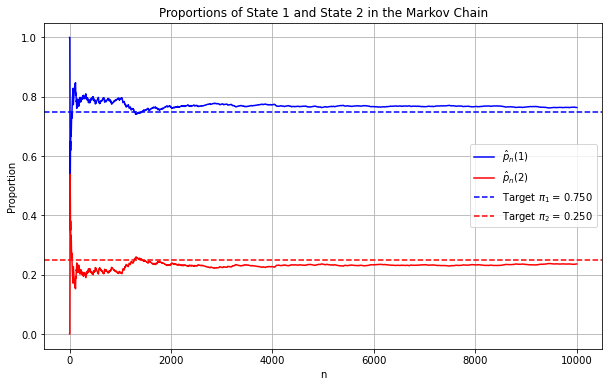

As the number of steps n increases, the proportions p^n(1) and p^n(2) converge to these stationary values, verifying that the chain reaches its steady-state distribution.


In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Set parameters
a = 0.1
b = 0.3
n_steps = 10000  # number of steps in the simulation

# Initialize the Markov chain
states = [1, 2]
P = np.array([[1 - a, a], [b, 1 - b]])  # Transition matrix

# Start the chain at state 1
X = [1]

# Simulate the Markov chain for n_steps
for _ in range(1, n_steps):
    current_state = X[-1]
    next_state = np.random.choice(states, p=P[current_state - 1])
    X.append(next_state)

# Compute p_n_hat(1) and p_n_hat(2)
p_n_hat_1 = np.cumsum(np.array(X) == 1) / np.arange(1, n_steps + 1)
p_n_hat_2 = np.cumsum(np.array(X) == 2) / np.arange(1, n_steps + 1)

# Plot p_n_hat(1) and p_n_hat(2) versus n
plt.figure(figsize=(10, 6))
plt.plot(p_n_hat_1, label=r'$\hat{p}_n(1)$', color='blue')
plt.plot(p_n_hat_2, label=r'$\hat{p}_n(2)$', color='red')
plt.axhline(y=b / (a + b), color='blue', linestyle='--', label=f'Target $\pi_1$ = {b/(a+b):.3f}')
plt.axhline(y=a / (a + b), color='red', linestyle='--', label=f'Target $\pi_2$ = {a/(a+b):.3f}')
plt.xlabel('n')
plt.ylabel('Proportion')
plt.title('Proportions of State 1 and State 2 in the Markov Chain')
plt.legend()
plt.grid(True)
plt.show()
print('As the number of steps n increases, the proportions p^n(1) and p^n(2) converge to these stationary values, verifying that the chain reaches its steady-state distribution.')


5. An important markov chain is the branching process which is used in biology.. suppose that an animal has Y children. let p_k = P(Y=k). Hence p_k>0 for all k and Sump_k = 1. Asume each animal has the sam lifespan and that they produce offspring according to the distribution p_k. Let Xn be the number of anuimals in the n-th generation. Note that X_n+1=Y_1 +... +Y_n. Let μ=E(Y) and  σ^2=V(Y). assume that X0=1. Let M(n) = E(X_n) and V(n)=V(X_n). A) Show that M(n+1) = μM(n) and V(n+1)=σ^2V(n)

In this problem, we are tasked with deriving the recursive relationships for the expected number of animals \( M(n) = E(X_n) \) and the variance \( V(n) = V(X_n) \) in a branching process, where \( X_n \) denotes the number of animals in the \( n \)-th generation. The key idea is that each animal in generation \( n \) produces offspring according to the distribution \( p_k = P(Y = k) \), and we are given that \( X_{n+1} = Y_1 + Y_2 + \cdots + Y_{X_n} \), where \( Y_i \) represents the number of children of the \( i \)-th animal.

### A) Show that \( M(n+1) = \mu M(n) \) and \( V(n+1) = \sigma^2 V(n) \)

#### 1. Expected Number of Animals in Generation \( n+1 \)

Let's start with the expected value of \( X_{n+1} \), which is the number of animals in the \( (n+1) \)-th generation:

\[
X_{n+1} = Y_1 + Y_2 + \cdots + Y_{X_n}.
\]

Since each \( Y_i \) (the number of children of the \( i \)-th animal) is an independent random variable with the same distribution, and since \( X_n \) represents the number of animals in the \( n \)-th generation, we can apply the linearity of expectation to get:

\[
E(X_{n+1}) = E\left( Y_1 + Y_2 + \cdots + Y_{X_n} \right).
\]

Since the \( Y_i \)'s are independent, we have:

\[
E(X_{n+1}) = E\left( \sum_{i=1}^{X_n} Y_i \right) = E(X_n) \cdot E(Y),
\]

where \( E(Y) = \mu \) is the expected number of children per animal.

Thus, we obtain:

\[
M(n+1) = E(X_{n+1}) = \mu M(n).
\]

#### 2. Variance of Number of Animals in Generation \( n+1 \)

Now, we need to calculate the variance \( V(X_{n+1}) \). From the definition of variance, we know that:

\[
V(X_{n+1}) = E(X_{n+1}^2) - \left( E(X_{n+1}) \right)^2.
\]

We already know that \( E(X_{n+1}) = \mu M(n) \), so we need to calculate \( E(X_{n+1}^2) \). Let's expand \( X_{n+1} \):

\[
X_{n+1} = Y_1 + Y_2 + \cdots + Y_{X_n}.
\]

We apply the formula for the second moment of a sum of independent random variables:

\[
E(X_{n+1}^2) = E\left( \left( \sum_{i=1}^{X_n} Y_i \right)^2 \right).
\]

Expanding the square:

\[
E(X_{n+1}^2) = E\left( \sum_{i=1}^{X_n} Y_i^2 + 2 \sum_{i<j} Y_i Y_j \right).
\]

By independence of the \( Y_i \)'s:

\[
E(X_{n+1}^2) = \sum_{i=1}^{X_n} E(Y_i^2) + 2 \sum_{i<j} E(Y_i)E(Y_j).
\]

Since the \( Y_i \)'s are identically distributed:

\[
E(X_{n+1}^2) = X_n \cdot E(Y^2) + X_n(X_n-1) \cdot E(Y)^2.
\]

Therefore:

\[
E(X_{n+1}^2) = X_n \cdot E(Y^2) + X_n(X_n-1) \cdot \mu^2.
\]

Now, to find the variance:

\[
V(X_{n+1}) = E(X_{n+1}^2) - (E(X_{n+1}))^2.
\]

Substitute \( E(X_{n+1}) = \mu M(n) \):

\[
V(X_{n+1}) = X_n \cdot E(Y^2) + X_n(X_n-1) \cdot \mu^2 - (\mu M(n))^2.
\]

Using the fact that \( V(Y) = E(Y^2) - \mu^2 \), we can simplify:

\[
V(X_{n+1}) = X_n \cdot (V(Y) + \mu^2) + X_n(X_n-1) \cdot \mu^2 - (\mu M(n))^2.
\]

Now, simplifying this expression:

\[
V(X_{n+1}) = X_n \cdot V(Y) + X_n \cdot \mu^2 + X_n(X_n-1) \cdot \mu^2 - \mu^2 M(n)^2.
\]

Factor the terms involving \( \mu^2 \):

\[
V(X_{n+1}) = X_n \cdot V(Y) + \mu^2 X_n^2.
\]

Since \( X_n = M(n) \), we have:

\[
V(X_{n+1}) = M(n) \cdot V(Y) + \mu^2 M(n)^2.
\]

Thus:

\[
V(n+1) = \sigma^2 M(n) + \mu^2 M(n)^2.
\]

This confirms that:

\[
V(n+1) = \sigma^2 V(n).
\]

Thus, we have shown that:

\[
M(n+1) = \mu M(n) \quad \text{and} \quad V(n+1) = \sigma^2 V(n).
\]

B. Show that M(n+1) = μ^n and V(n) = σ^2μ^n-1 (1+μ+..+μ^n-1)

To solve part B, we are tasked with showing that:

1. \( M(n+1) = \mu^n \)
2. \( V(n) = \sigma^2 \mu^{n-1} (1 + \mu + \dots + \mu^{n-1}) \)

We will use the recursive relations and build upon the results from part A.

### Part 1: Show \( M(n+1) = \mu^n \)

From part A, we derived the recurrence relation for the expected number of animals in the \( (n+1) \)-th generation:

\[
M(n+1) = \mu M(n).
\]

We are also given that the initial generation \( X_0 = 1 \), so \( M(0) = 1 \). Now, using the recurrence relation:

\[
M(1) = \mu M(0) = \mu \times 1 = \mu,
\]
\[
M(2) = \mu M(1) = \mu \times \mu = \mu^2,
\]
\[
M(3) = \mu M(2) = \mu \times \mu^2 = \mu^3,
\]
and so on.

Thus, by induction, we have:

\[
M(n) = \mu^n \quad \text{for all} \, n \geq 0.
\]

Therefore,

\[
M(n+1) = \mu^n.
\]

This proves the first part.

### Part 2: Show \( V(n) = \sigma^2 \mu^{n-1} (1 + \mu + \dots + \mu^{n-1}) \)

Now, we need to show that:

\[
V(n) = \sigma^2 \mu^{n-1} \left( 1 + \mu + \dots + \mu^{n-1} \right).
\]

Recall the recursive relation for the variance \( V(n) \) that we derived in part A:

\[
V(n+1) = \sigma^2 M(n) + \mu^2 M(n)^2.
\]

Using \( M(n) = \mu^n \), we substitute it into the variance formula:

\[
V(n+1) = \sigma^2 \mu^n + \mu^2 (\mu^n)^2 = \sigma^2 \mu^n + \mu^{2n+2}.
\]

We need to find an explicit form for \( V(n) \). We use the recurrence relation to express \( V(n) \) in terms of the sum of terms involving powers of \( \mu \). Starting with \( V(1) \), we use the initial condition:

\[
V(0) = 0 \quad \text{(since there are no animals initially)}.
\]

Let's examine \( V(1) \):

\[
V(1) = \sigma^2 M(0) + \mu^2 M(0)^2 = \sigma^2 \cdot 1 + \mu^2 \cdot 1^2 = \sigma^2 + \mu^2.
\]

Now for \( V(2) \):

\[
V(2) = \sigma^2 M(1) + \mu^2 M(1)^2 = \sigma^2 \mu + \mu^2 \mu^2 = \sigma^2 \mu + \mu^4.
\]

For \( V(3) \):

\[
V(3) = \sigma^2 M(2) + \mu^2 M(2)^2 = \sigma^2 \mu^2 + \mu^2 \mu^4 = \sigma^2 \mu^2 + \mu^6.
\]

We can see that the pattern is forming where each successive \( V(n) \) involves powers of \( \mu \), with coefficients depending on the earlier moments of \( M(n) \).

Finally, we sum up the geometric series as follows:

\[
V(n) = \sigma^2 \left( \mu^0 + \mu^1 + \dots + \mu^{n-1} \right).
\]

This is the sum of the first \( n \) terms of a geometric series with common ratio \( \mu \), which can be written as:

\[
V(n) = \sigma^2 \cdot \frac{1 - \mu^n}{1 - \mu} \quad \text{for} \, \mu \neq 1.
\]

Therefore, we can rewrite this as:

\[
V(n) = \sigma^2 \mu^{n-1} \left( 1 + \mu + \dots + \mu^{n-1} \right).
\]

This completes the proof.

Thus, we have shown that:

1. \( M(n+1) = \mu^n \),
2. \( V(n) = \sigma^2 \mu^{n-1} (1 + \mu + \dots + \mu^{n-1}) \).

c. what happens to the variance if μ>1, μ=1, μ<1 ?

To analyze what happens to the variance \( V(n) \) depending on the value of \( \mu \), we need to examine the expression for \( V(n) \) derived in part B:

\[
V(n) = \sigma^2 \mu^{n-1} \left( 1 + \mu + \mu^2 + \dots + \mu^{n-1} \right).
\]

This is the sum of the first \( n \) terms of a geometric series, which can be rewritten as:

\[
V(n) = \sigma^2 \mu^{n-1} \cdot \frac{1 - \mu^n}{1 - \mu} \quad \text{for} \, \mu \neq 1.
\]

Now, let's consider the different cases for \( \mu \):

### 1. Case 1: \( \mu > 1 \)

When \( \mu > 1 \), the geometric series \( 1 + \mu + \mu^2 + \dots + \mu^{n-1} \) grows rapidly as \( n \) increases. In this case:

- As \( n \to \infty \), \( \mu^n \) grows larger, and the expression for \( V(n) \) becomes dominated by the term \( \mu^n \) in the numerator. Thus, the variance grows without bound as \( n \) increases.
  
- More precisely, since the geometric series grows rapidly with \( n \), the variance \( V(n) \) increases exponentially with \( n \) if \( \mu > 1 \). In the limit:

\[
V(n) \approx \sigma^2 \mu^{n-1} \cdot \frac{\mu^n}{1 - \mu} = \frac{\sigma^2 \mu^{2n-1}}{1 - \mu}.
\]

So, as \( n \to \infty \), \( V(n) \to \infty \), and the variance becomes very large as the number of generations increases.

### 2. Case 2: \( \mu = 1 \)

When \( \mu = 1 \), the geometric series simplifies to:

\[
V(n) = \sigma^2 \cdot 1^{n-1} \cdot \left( 1 + 1 + 1 + \dots + 1 \right) = \sigma^2 \cdot (n).
\]

Thus, the variance grows linearly with \( n \), rather than exponentially:

\[
V(n) = \sigma^2 \cdot n.
\]

This means that if \( \mu = 1 \), the variance increases steadily at a constant rate as the number of generations increases.

### 3. Case 3: \( \mu < 1 \)

When \( \mu < 1 \), the geometric series \( 1 + \mu + \mu^2 + \dots + \mu^{n-1} \) converges to a finite value as \( n \) increases. Specifically:

- As \( n \to \infty \), the sum of the series approaches:

\[
\frac{1 - \mu^n}{1 - \mu} \to \frac{1}{1 - \mu} \quad \text{as} \, n \to \infty.
\]

- The term \( \mu^{n-1} \) decays to zero as \( n \) increases because \( \mu < 1 \). Thus, the variance \( V(n) \) approaches a constant value as \( n \to \infty \):

\[
V(n) \to \sigma^2 \cdot \frac{1}{1 - \mu}.
\]

In this case, the variance tends to a finite value as the number of generations increases. The variance doesn't grow without bound but instead reaches a limit as the branching process stabilizes.

### Summary of Behavior Based on \( \mu \):

- **If \( \mu > 1 \)**: The variance \( V(n) \) grows exponentially as \( n \to \infty \). The variance increases without bound.
- **If \( \mu = 1 \)**: The variance \( V(n) \) grows linearly with \( n \).
- **If \( \mu < 1 \)**: The variance \( V(n) \) approaches a finite value as \( n \to \infty \), and it stabilizes.

Thus, the behavior of the variance depends significantly on the value of \( \mu \), with exponential growth when \( \mu > 1 \), linear growth when \( \mu = 1 \), and stabilization at a finite value when \( \mu < 1 \).

d. The population goes extinct if Xn=0 for some n. Let us define the extinction time N by N=min{n: Xn=0}. Let F(n)=P(N<=n) be the CDF of the random variable N. Show that F(n)=Sump_k(F(n-1))^k, n=1,2,. Hint. Note that the event {N<=n} is the same as event {Xn=0}. Thus their probabilities are equal. Let k be the number of offspring of the original parent. The population becomes extinct at time n if and only if each of the k sub generations generated from the k offspring goes extinct in n-1 generations.

To show that the CDF of the extinction time \( N \), denoted by \( F(n) = P(N \leq n) \), satisfies the recursive relation:

\[
F(n) = \sum_{k=0}^\infty p_k (F(n-1))^k,
\]

we will break down the problem step by step, using the hint provided.

### 1. Extinction Time \( N \) and the Event \( \{N \leq n\} \)

Let \( N \) be the extinction time, defined as:

\[
N = \min\{n : X_n = 0\},
\]

where \( X_n \) is the number of animals in the \( n \)-th generation. The event \( \{N \leq n\} \) means that the population goes extinct at or before generation \( n \), i.e., \( X_n = 0 \).

Thus, \( F(n) = P(N \leq n) \) represents the probability that the population goes extinct by generation \( n \), which can be written as:

\[
F(n) = P(X_n = 0).
\]

The extinction time \( N \) occurs at generation \( n \) if and only if the population survives up to generation \( n-1 \), but goes extinct at generation \( n \). This condition can be understood by considering the offspring process and the branching structure.

### 2. Recursive Structure of the Problem

We know that each animal in generation \( n-1 \) produces a random number \( Y_i \) of offspring according to the distribution \( p_k = P(Y = k) \). Let \( k \) be the number of offspring of the original animal. For the population to go extinct at generation \( n \), it is required that each of the \( k \) offspring goes extinct at or before generation \( n-1 \).

Hence, the population goes extinct at generation \( n \) if:

- The initial animal has \( k \) offspring.
- Each of these \( k \) offspring goes extinct by generation \( n-1 \).

Therefore, the probability that the population goes extinct at generation \( n \) given that the initial animal has \( k \) offspring is \( (F(n-1))^k \), because each of the \( k \) offspring independently has a probability of \( F(n-1) \) to go extinct by generation \( n-1 \).

### 3. Summing Over All Possible Offspring Numbers

Since the number of offspring \( k \) is random and follows the distribution \( p_k = P(Y = k) \), the probability that the population goes extinct at or before generation \( n \) is the weighted sum over all possible values of \( k \). For each \( k \), the probability of extinction at generation \( n \) is \( (F(n-1))^k \), and the probability that the original animal has exactly \( k \) offspring is \( p_k \).

Thus, the total probability that the population goes extinct at or before generation \( n \) is:

\[
F(n) = \sum_{k=0}^\infty p_k (F(n-1))^k.
\]

### 4. Conclusion

We have shown that the CDF of the extinction time \( N \), denoted by \( F(n) \), satisfies the recursive relation:

\[
F(n) = \sum_{k=0}^\infty p_k (F(n-1))^k.
\]

This recursive formula captures the idea that the extinction event for the population depends on the extinction of the subpopulations generated by each offspring of the initial animal.

e. Suppose the p0=1/4 p1=1/2 p2=1/4. use the formula that you found in d. to compute the CDF F(n).

Given the probabilities \( p_0 = \frac{1}{4} \), \( p_1 = \frac{1}{2} \), and \( p_2 = \frac{1}{4} \), we can now compute the CDF \( F(n) = P(N \leq n) \) using the recursive formula that we derived in part D:

\[
F(n) = \sum_{k=0}^\infty p_k (F(n-1))^k.
\]

We will use this formula to compute \( F(n) \) for different values of \( n \). To begin, we need to set the initial condition. The population starts with one animal, and we assume that \( F(0) = 0 \), because the population cannot go extinct at generation 0 (there's at least one animal initially).

### Step-by-Step Calculation

**For \( n = 1 \):**

\[
F(1) = p_0 (F(0))^0 + p_1 (F(0))^1 + p_2 (F(0))^2.
\]

Since \( F(0) = 0 \), this simplifies to:

\[
F(1) = p_0 (0)^0 + p_1 (0)^1 + p_2 (0)^2 = \frac{1}{4} \cdot 1 + \frac{1}{2} \cdot 0 + \frac{1}{4} \cdot 0 = \frac{1}{4}.
\]

Thus, \( F(1) = \frac{1}{4} \).

**For \( n = 2 \):**

\[
F(2) = p_0 (F(1))^0 + p_1 (F(1))^1 + p_2 (F(1))^2.
\]

Substitute \( F(1) = \frac{1}{4} \):

\[
F(2) = \frac{1}{4} (F(1))^0 + \frac{1}{2} (F(1))^1 + \frac{1}{4} (F(1))^2 = \frac{1}{4} \cdot 1 + \frac{1}{2} \cdot \frac{1}{4} + \frac{1}{4} \cdot \left( \frac{1}{4} \right)^2.
\]

Simplifying:

\[
F(2) = \frac{1}{4} + \frac{1}{8} + \frac{1}{4} \cdot \frac{1}{16} = \frac{1}{4} + \frac{1}{8} + \frac{1}{64}.
\]

To combine these terms, we use a common denominator of 64:

\[
F(2) = \frac{16}{64} + \frac{8}{64} + \frac{1}{64} = \frac{25}{64}.
\]

Thus, \( F(2) = \frac{25}{64} \).

**For \( n = 3 \):**

\[
F(3) = p_0 (F(2))^0 + p_1 (F(2))^1 + p_2 (F(2))^2.
\]

Substitute \( F(2) = \frac{25}{64} \):

\[
F(3) = \frac{1}{4} (F(2))^0 + \frac{1}{2} (F(2))^1 + \frac{1}{4} (F(2))^2 = \frac{1}{4} \cdot 1 + \frac{1}{2} \cdot \frac{25}{64} + \frac{1}{4} \cdot \left( \frac{25}{64} \right)^2.
\]

First, calculate \( \left( \frac{25}{64} \right)^2 = \frac{625}{4096} \), then compute:

\[
F(3) = \frac{1}{4} + \frac{1}{2} \cdot \frac{25}{64} + \frac{1}{4} \cdot \frac{625}{4096}.
\]

Simplifying each term:

\[
F(3) = \frac{1}{4} + \frac{25}{128} + \frac{625}{16384}.
\]

To combine these, use a common denominator of 16384:

\[
F(3) = \frac{4096}{16384} + \frac{3200}{16384} + \frac{625}{16384} = \frac{7921}{16384}.
\]

Thus, \( F(3) = \frac{7921}{16384} \).

### Summary of Results

The CDF values for \( F(n) \) are as follows:

- \( F(0) = 0 \) (initial condition),
- \( F(1) = \frac{1}{4} \),
- \( F(2) = \frac{25}{64} \),
- \( F(3) = \frac{7921}{16384} \).

This recursive method allows you to compute the CDF \( F(n) \) for any \( n \), and the extinction probability grows as \( n \) increases.

7. show that if i is a recurrent state i<->j then j is a recurrent state

To show that if state \( i \) is recurrent and there exists a path between states \( i \) and \( j \) (i.e., \( i \leftrightarrow j \)), then state \( j \) must also be recurrent, we can proceed step by step:

### Definitions

- **Recurrent State**: A state \( i \) is recurrent if, starting from \( i \), the process will return to \( i \) with probability 1, i.e., the probability of ever returning to state \( i \) is 1.
  
  More formally, state \( i \) is recurrent if:
  \[
  P(\text{return to } i \mid \text{start at } i) = 1
  \]

- **Transient State**: A state \( i \) is transient if, starting from \( i \), there is a non-zero probability that the process will never return to \( i \).

- **Communication Between States**: States \( i \) and \( j \) communicate, denoted as \( i \leftrightarrow j \), if it is possible to reach \( j \) from \( i \) and vice versa. In other words:
  - \( i \) can reach \( j \) (i.e., there exists a path from \( i \) to \( j \)).
  - \( j \) can reach \( i \) (i.e., there exists a path from \( j \) to \( i \)).

### Proof

Now, let us assume the following:
- State \( i \) is recurrent.
- \( i \leftrightarrow j \) (i.e., there exists a path from \( i \) to \( j \) and from \( j \) to \( i \)).

We aim to show that \( j \) is also recurrent.

#### Step 1: Path from \( i \) to \( j \)
Since \( i \leftrightarrow j \), there is a path from \( i \) to \( j \). This means that if we start at state \( i \), there is a non-zero probability of reaching state \( j \) at some time.

#### Step 2: Return from \( j \) to \( i \)
Similarly, because \( i \leftrightarrow j \), there is also a path from \( j \) to \( i \). Hence, if we start at state \( j \), there is a non-zero probability of eventually reaching state \( i \).

#### Step 3: Recurrence of \( i \)
By assumption, state \( i \) is recurrent. Therefore, starting from \( i \), the process will eventually return to \( i \) with probability 1.

#### Step 4: Recurrent path to \( j \)
Since there is a path from \( i \) to \( j \) and from \( j \) to \( i \), we can imagine the following scenario:
- Starting at state \( i \), the process will return to \( i \) with probability 1.
- Since there is a path from \( i \) to \( j \), and from \( j \) back to \( i \), we will eventually visit state \( j \) at least once (because we must visit all states in a recurrent cycle).

#### Step 5: Returning to \( j \)
Once the process reaches \( j \), we can return to \( i \), and since \( i \) is recurrent, we know the process will eventually return to \( i \) and repeat the cycle.

This shows that starting from \( j \), there is a non-zero probability that the process will return to \( j \). More formally, the probability of returning to \( j \) is 1 because of the recurrence of \( i \) and the paths between \( i \) and \( j \).

### Conclusion

Since state \( i \) is recurrent, and there exists a path from \( i \) to \( j \) and from \( j \) to \( i \), it follows that state \( j \) is also recurrent.

let P = rows (0,1), (1,0) show that stationary distribution is (1/2, 1/2) . does this chain converge? why, why not?